In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!which python
print(tf.__version__)


/home/lol/Desktop/Labs/AI/.venv/bin/python
2.2.0


In [2]:
import glob
import cv2

def read_glob(path):
    arr = []
    files = glob.glob(path)
    for filepath in sorted(files):
        img = cv2.imread(filepath,0)
        # print(img.shape)
        img = img.reshape(32,32,1)
        # print(img.shape)
        img = img / 255
        arr.append(img)
    return np.array(arr)

happy = read_glob("./crop/happy/linq*/*")
normal = read_glob("./crop/normal/linq*/*")
sad = read_glob("./crop/sad/linq*/*")

# print(happy, normal,sad,sep='\n')

# happy = gen.flow_from_directory(
#     "./crop/happy/linq_100x140/",
#     target_size=(32,32),
# )


my_happy = read_glob("./crop/happy/my*/*")
my_normal = read_glob("./crop/normal/my*/*")
my_sad = read_glob("./crop/sad/my*/*")

my = np.concatenate([my_happy,my_normal,my_sad])
my_res = np.concatenate([
    np.array([0]*len(my_happy)),
    np.array([1]*len(my_normal)),
    np.array([2]*len(my_sad))
])
kk = keras.utils.to_categorical(my_res,
    num_classes=3
)

images = np.concatenate([happy,normal,sad])
images = images.reshape(len(images), 32, 32, 1)
images_res = np.concatenate([
    np.array([0]*len(happy)),
    np.array([1]*len(normal)),
    np.array([2]*len(sad))
])
k = keras.utils.to_categorical(images_res,
    num_classes=3
)


def plot_history(history):
    fig, axis = plt.subplots(2,figsize=(16,10))
    keys = ('loss','accuracy')
    cols = ('red', 'blue')
    loc = ("upper right", "lower right")

    for idx, key in enumerate(keys):
        axis[idx].plot(history.epoch, history.history["val_"+key],
                    '--', label="val_"+key, color=cols[idx])
        axis[idx].plot(history.epoch, history.history[key], color=cols[idx], label=key)
        axis[idx].legend(loc=loc[idx])
        axis[idx].set(ylabel=key)

    plt.xlabel('Epochs')
    plt.legend()
    fig.show()

    # plt.xlim([0,max(history.epoch)])
# plot_history([('test',test)])

In [23]:
model = keras.Sequential()
model.add(keras.layers.Input(shape=(32,32,1),name="input"))
model.add(keras.layers.Flatten(input_shape=(32,32), name="flat"))
model.add(keras.layers.Dense(32*2, activation='relu', name="process", input_dim=32*32))
model.add(keras.layers.Dense(3, activation='softmax', name="categorize"))

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
# model.summary()

# print(images.shape)


aug = keras.preprocessing.image.ImageDataGenerator(
    rotation_range=5,
    # zoom_range=0.2,
    # width_shift_range=0.07,
    # height_shift_range=0.07,
    # shear_range=0.05,
    horizontal_flip=True,
    fill_mode="nearest")

history = model.fit(aug.flow(images, k), epochs=65, validation_data=(my, kk))

# my_happy = read_glob("./crop/happy/happy/*.png")
test = model.evaluate(my,kk)
# print(test)


Epoch 1/65
9/9 [==============================] - 0s 18ms/step - loss: 1.4331 - accuracy: 0.2966 - val_loss: 1.5253 - val_accuracy: 0.2583
Epoch 2/65
9/9 [==============================] - 0s 11ms/step - loss: 1.1504 - accuracy: 0.3878 - val_loss: 1.0732 - val_accuracy: 0.3841
Epoch 3/65
9/9 [==============================] - 0s 12ms/step - loss: 1.1452 - accuracy: 0.3042 - val_loss: 1.0718 - val_accuracy: 0.4636
Epoch 4/65
9/9 [==============================] - 0s 12ms/step - loss: 1.0894 - accuracy: 0.3954 - val_loss: 1.0513 - val_accuracy: 0.4834
Epoch 5/65
9/9 [==============================] - 0s 11ms/step - loss: 1.0422 - accuracy: 0.4373 - val_loss: 1.0853 - val_accuracy: 0.3841
Epoch 6/65
9/9 [==============================] - 0s 11ms/step - loss: 1.0352 - accuracy: 0.4259 - val_loss: 1.0438 - val_accuracy: 0.4106
Epoch 7/65
9/9 [==============================] - 0s 11ms/step - loss: 1.0241 - accuracy: 0.3954 - val_loss: 1.0383 - val_accuracy: 0.5099
Epoch 8/65
9/9 [===========

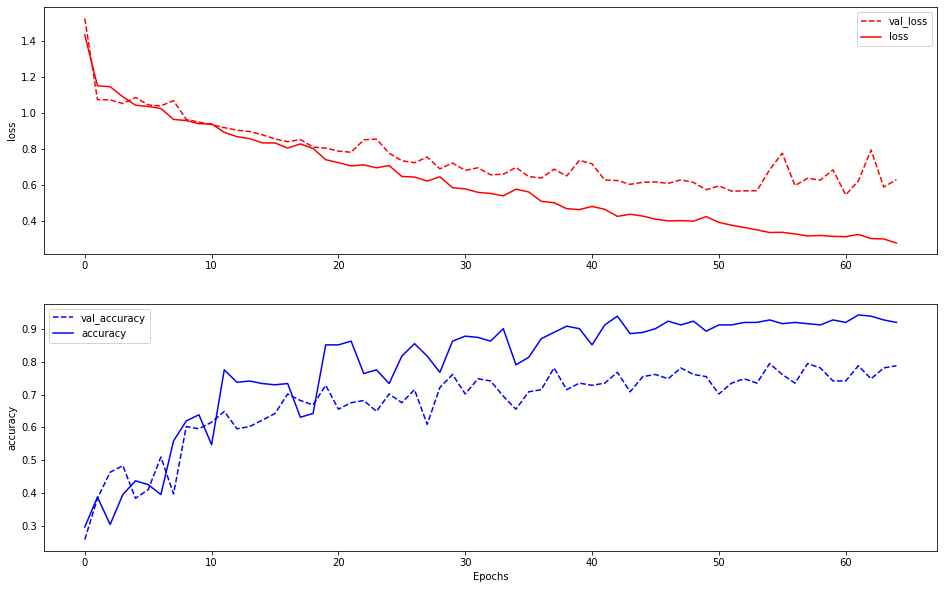

In [24]:
plot_history(history)

In [25]:
# tfrand.set_seed(1)
model = keras.Sequential()
model.add(keras.layers.Input(shape=(32,32,1),name="input"))
model.add(keras.layers.Flatten(input_shape=(32,32), name="flat"))
model.add(keras.layers.Dense(32*3, activation='relu', input_dim=32*32))
model.add(keras.layers.Dense(32*3, activation='relu', input_dim=32*32))
model.add(keras.layers.Dense(32*3, activation='relu', input_dim=32*32))
model.add(keras.layers.Dense(32*3, activation='relu', input_dim=32*32))
model.add(keras.layers.Dense(3, activation='softmax', name="categorize"))

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0003, beta_1=0.9, beta_2=0.91),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
# model.summary()

history = model.fit(aug.flow(images, k), epochs=50, validation_data=(my, kk))
test = model.evaluate(my,kk)

Epoch 1/50
9/9 [==============================] - 0s 21ms/step - loss: 1.0914 - accuracy: 0.4144 - val_loss: 1.1147 - val_accuracy: 0.2053
Epoch 2/50
9/9 [==============================] - 0s 11ms/step - loss: 1.0829 - accuracy: 0.3650 - val_loss: 1.0939 - val_accuracy: 0.4172
Epoch 3/50
9/9 [==============================] - 0s 13ms/step - loss: 1.0560 - accuracy: 0.4639 - val_loss: 1.0903 - val_accuracy: 0.4570
Epoch 4/50
9/9 [==============================] - 0s 11ms/step - loss: 1.0446 - accuracy: 0.4601 - val_loss: 1.0755 - val_accuracy: 0.4967
Epoch 5/50
9/9 [==============================] - 0s 10ms/step - loss: 1.0293 - accuracy: 0.4981 - val_loss: 1.0675 - val_accuracy: 0.4172
Epoch 6/50
9/9 [==============================] - 0s 12ms/step - loss: 1.0111 - accuracy: 0.5285 - val_loss: 1.0697 - val_accuracy: 0.3841
Epoch 7/50
9/9 [==============================] - 0s 11ms/step - loss: 1.0091 - accuracy: 0.4677 - val_loss: 1.0763 - val_accuracy: 0.3775
Epoch 8/50
9/9 [===========

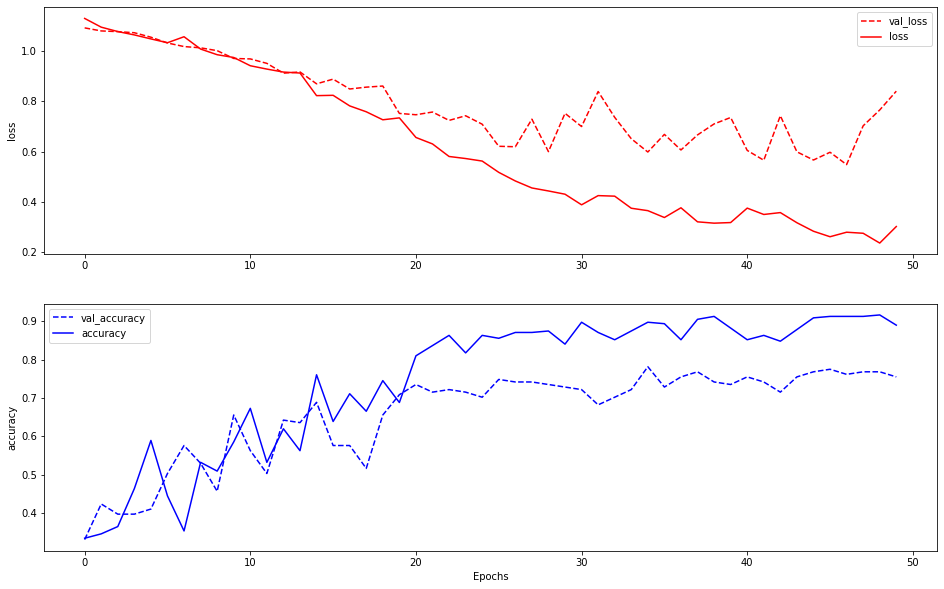

In [18]:
plot_history(history)

In [82]:
model = keras.Sequential()
# model.add(keras.layers.Conv2D(3, kernel_size=(3, 3),
#                         activation='relu',
#                         input_shape=(32,32,1)))
model.add(keras.layers.Conv2D(30, kernel_size=(3, 3),
                        activation='relu',
                        input_shape=(32,32,1)))
# model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
# model.add(keras.layers.Conv2D(40, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

# model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(3, activation='softmax'))

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

aug = keras.preprocessing.image.ImageDataGenerator(
    rotation_range=8,
    # zoom_range=0.02,
    # width_shift_range=0.07,
    # height_shift_range=0.07,
    # shear_range=0.05,
    # featurewise_center=True,
    # samplewise_center=True,
    # featurewise_std_normalization=True,
    # samplewise_std_normalization=True,
    horizontal_flip=True)

history = model.fit(aug.flow(images, k), epochs=60, validation_data=(my, kk))

Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_53 (Conv2D)           (None, 30, 30, 30)        300       
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 15, 15, 30)        0         
_________________________________________________________________
flatten_34 (Flatten)         (None, 6750)              0         
_________________________________________________________________
dense_80 (Dense)             (None, 32)                216032    
_________________________________________________________________
dropout_28 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_81 (Dense)             (None, 3)                 99        
Total params: 216,431
Trainable params: 216,431
Non-trainable params: 0
_______________________________________________

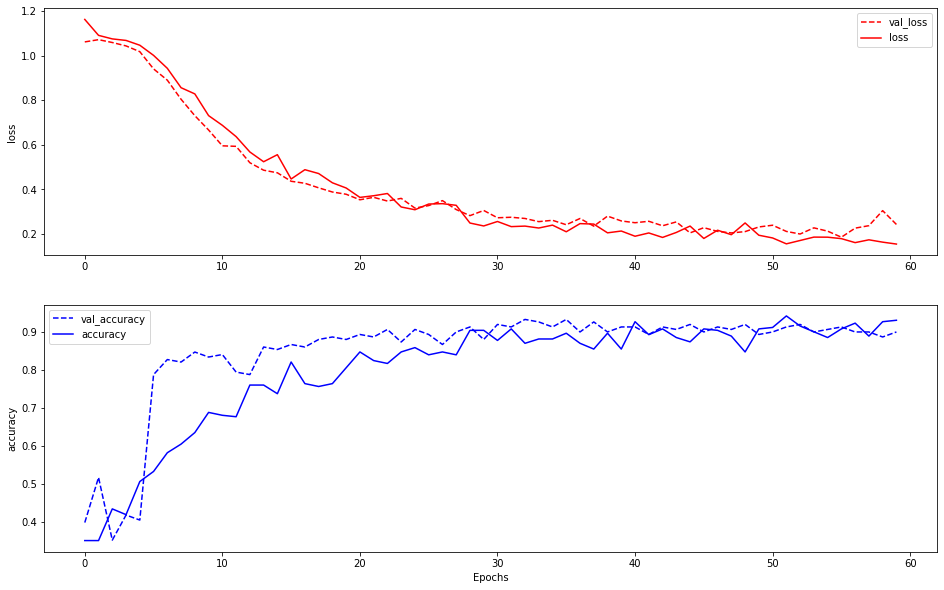

In [83]:
plot_history(history)